# Reuters dataset

#### Classify articles into one of 46 topics

The x data is a list of indices in the list of all words for each word that appears <br>
The y data is the index of the topic <br>

This is a multiclass classification problem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

from keras import models
from keras import layers
from keras.datasets import reuters
from sklearn.preprocessing import StandardScaler

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=n_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


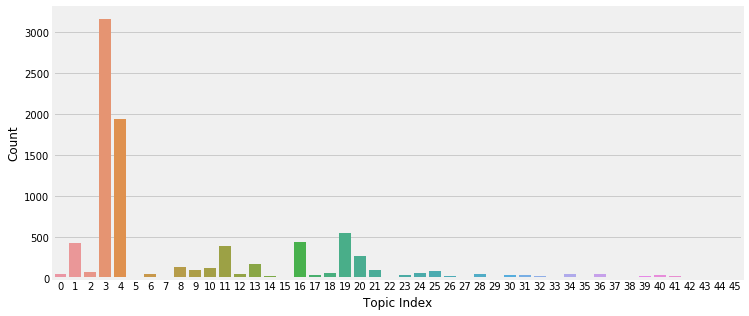

In [3]:
graph.figure(figsize=(11, 5))
sns.countplot(y_train)
graph.xlabel('Topic Index')
graph.ylabel('Count')
graph.show()

n_topics = len(set(y_train))

In [4]:
# Convert the list of indices to a feature set n_words long with a zero or one indicating prescence of the words
def vectorize_data(data, dimension=n_words):
    results = np.zeros((len(data), dimension))
    for i, seq in enumerate(data):
        results[i, seq] = 1
    return results

x_train = vectorize_data(x_train)
x_test = vectorize_data(x_test)

# Convert labels to one hot encoding, note: can do this with keras.ultils.np_utils.to_categorical
def one_hot_label(labels, dimension=n_topics):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = one_hot_label(y_train)
y_test = one_hot_label(y_test)

val_size = 2500
x_val_test, y_val_test, x_val_train, y_val_train = x_train[:val_size], y_train[:val_size], x_train[val_size:], y_train[val_size:] 

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_topics, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_val_train, y_val_train, epochs=9, batch_size=512, validation_data=(x_val_test, y_val_test))

Train on 6482 samples, validate on 2500 samples
Epoch 1/9
6482/6482 [==============================] - 1s 151us/step - loss: 3.2719 - acc: 0.3473 - val_loss: 2.6977 - val_acc: 0.3788
Epoch 2/9
6482/6482 [==============================] - 1s 118us/step - loss: 2.3394 - acc: 0.4636 - val_loss: 2.0886 - val_acc: 0.5296
Epoch 3/9
6482/6482 [==============================] - 1s 118us/step - loss: 1.8230 - acc: 0.6069 - val_loss: 1.7723 - val_acc: 0.6252
Epoch 4/9
6482/6482 [==============================] - 1s 112us/step - loss: 1.5316 - acc: 0.6748 - val_loss: 1.5953 - val_acc: 0.6528
Epoch 5/9
6482/6482 [==============================] - 1s 113us/step - loss: 1.3369 - acc: 0.7103 - val_loss: 1.4681 - val_acc: 0.6776
Epoch 6/9
6482/6482 [==============================] - 1s 112us/step - loss: 1.1824 - acc: 0.7397 - val_loss: 1.3779 - val_acc: 0.6968
Epoch 7/9
6482/6482 [==============================] - 1s 119us/step - loss: 1.0554 - acc: 0.7637 - val_loss: 1.3010 - val_acc: 0.7148
Epoch 8

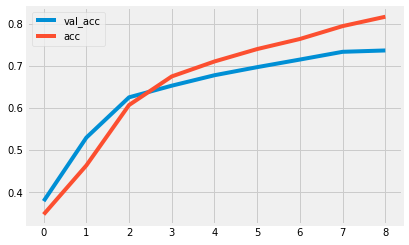

In [6]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_topics, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 140us/step - loss: 2.4732 - acc: 0.5320
Epoch 2/9
8982/8982 [==============================] - 1s 119us/step - loss: 1.3639 - acc: 0.7042
Epoch 3/9
8982/8982 [==============================] - 1s 116us/step - loss: 1.0222 - acc: 0.7825
Epoch 4/9
8982/8982 [==============================] - 1s 116us/step - loss: 0.8002 - acc: 0.8346
Epoch 5/9
8982/8982 [==============================] - 1s 117us/step - loss: 0.6338 - acc: 0.8690
Epoch 6/9
8982/8982 [==============================] - 1s 122us/step - loss: 0.5042 - acc: 0.8970
Epoch 7/9
8982/8982 [==============================] - 1s 117us/step - loss: 0.4077 - acc: 0.9126
Epoch 8/9
8982/8982 [==============================] - 1s 116us/step - loss: 0.3340 - acc: 0.9265
Epoch 9/9
8982/8982 [==============================] - 1s 116us/step - loss: 0.2765 - acc: 0.9355


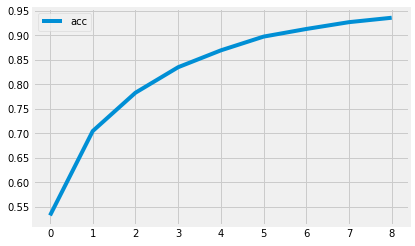

In [8]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

In [9]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 164us/step


[0.9339641915403725, 0.799198575297956]